# OCR com Python e Tesseract

## Reconhecimento de texto em imagens

### Instalando o Tessseract
### Documentação: https://pypi.org/project/pytesseract/

!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install Pillow==9.1.0

In [69]:
import pytesseract
import numpy as np
import cv2 #OpenCV
import sys
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\\tesseract.exe'

### Leitura de imagem

In [70]:
img = cv2.imread('teste01.jpg')

print(type(img))
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [71]:
texto = pytesseract.image_to_string(img)
print(texto)

testando o
OCR...



# Suporte para caracteres e símbolos de outros idiomas

In [72]:
img1 = cv2.imread('Imagens/teste02.jpg')

cv2.imshow('imagem', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [73]:
rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

cv2.imshow('imagem', rgb)
cv2.waitKey(0)
sys.exit()
cv2.destroyAllWindows()

In [74]:
texto1 = pytesseract.image_to_string(rgb)
print(texto1)

inteligéncia
artificial e visao
computacional



!tesseract --list-langs

!sudo apt-get install tesseract-ocr-por

In [75]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

inteligência
artificial e visão
computacional



In [76]:
config_tesseract = '--tessdata-dir tessdata'

In [77]:
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



# Parâmetros

## Page segmentation modes (PSM)

In [78]:
!tesseract --help-psm

'tesseract' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [79]:
img = cv2.imread('Imagens/trecho-livro.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imshow('imagem', rgb)
cv2.waitKey(0)
sys.exit()
cv2.destroyAllWindows()

In [80]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [81]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
portanto, temer as transformações. Preci-

tâncias. Não devemos,
samos apenas fazer com que elas operem em nosso benefício.



In [82]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ªâªªââª%%ã%ãâêâã%%?ª%ã



In [83]:
img = cv2.imread('Imagens/saida.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imshow('imagem', rgb)
cv2.waitKey(0)
sys.exit()
cv2.destroyAllWindows()

In [84]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



## Detecção de orientação da página

In [85]:
from PIL import Image
import matplotlib.pyplot as plt

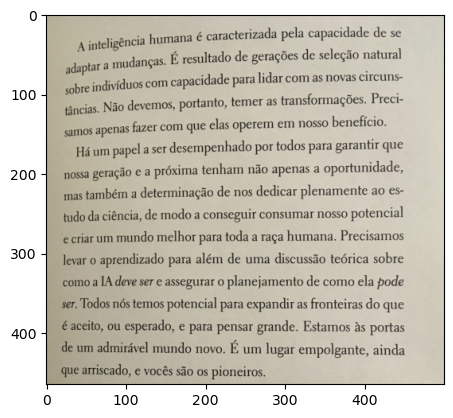

In [86]:
img = Image.open('Imagens/livro01.jpg')
plt.imshow(img);

In [87]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.36
Script: Latin
Script confidence: 13.08



## Seleção dos textos

In [88]:
from pytesseract import Output

In [95]:
img = cv2.imread('Imagens/teste_manuscrito_01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imshow('image',rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

- block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- left = coordenada x onde inicia a caixa delimitadora

- level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- line_num = número da linha do que foi detectado (inicia com 0)

- page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- text = o resultado do reconhecimento

- top = coordenada y onde a caixa delimitadora começa

- width = largura do bloco de texto atual detectado

- word_num = numero da palavra (indice) dentro do bloco atual

In [90]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2],
 'left': [0, 38, 38, 38, 38, 102, 102, 307],
 'top': [0, 79, 79, 79, 79, 228, 233, 228],
 'width': [700, 607, 607, 607, 607, 532, 77, 327],
 'height': [400, 236, 236, 92, 92, 87, 76, 87],
 'conf': [-1, -1, -1, -1, 90, -1, 77, 61],
 'text': ['', '', '', '', 'TESTANDO', '', 'O', 'OCR...']}

In [183]:
min_conf = 60 #@param {type: 'slider', min: 0, max: 100}

In [92]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
    x = resultado['left'][i]
    y = resultado['top'][i]
    w = resultado['width'][i]
    h = resultado['height'][i]

    cv2.rectangle(img, (x,y), (x + w,y + h), cor, 2)

    return x, y, img

In [97]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
    #print(i)
    confianca = int(resultado['conf'][i])
    #print(confianca)
    if confianca > min_conf:
        x, y, img = caixa_texto(resultado, img_copia)
        texto = resultado['text'][i]
        cv2.putText(img_copia, texto, (x, y - 10) ,cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255,))
        #print(x,y)


cv2.imshow('image', img_copia)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [129]:
img = cv2.imread('Imagens/teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [130]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 91, -1, 88, 93, 91, -1, 90],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [131]:
from PIL import ImageFont, ImageDraw ,Image
fonte = 'Fontes/calibri.ttf'

In [151]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
    fonte = ImageFont.truetype(fonte, tamanho_texto)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x,y - tamanho_texto), texto, font = fonte, fill=(0,0,255,0))
    img = np.array(img_pil)
    return img

In [133]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > min_conf:
        x, y, img = caixa_texto(resultado, img_copia)
        texto = resultado['text'][i]
        #cv2.putText(img_copia, texto, (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
        img_copia = escreve_texto(texto, x, y, img_copia, fonte)

cv2.imshow('image', img_copia)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Buscando informações específicas na imagem

In [121]:
import re # regular expressions

In [137]:
img = cv2.imread("Imagens/tabela_teste.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imshow('imagem', rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [138]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

### https://regexr.com/

In [139]:
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

In [159]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > min_conf:
        texto = resultado['text'][i]
        if re.match(padrao_data, texto):
            x, y, img_copia = caixa_texto(resultado, img_copia, (0,0,255))
            img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
            datas.append(texto)
        else:
            x, y, img = caixa_texto(resultado, img_copia)

cv2.imshow('imagem', img_copia)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [156]:
datas

['10/02/2021', '04/02/2021']

## Detecção de texto em cenários naturais

In [172]:
img = cv2.imread("Imagens/caneca.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imshow('imagem', rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [173]:
config_tesseract = "--tessdata-dir tessdata --psm 11"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
 'par_num': [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
 'left': [0,
  0,
  0,
  0,
  0,
  145,
  374,
  374,
  374,
  374,
  169,
  169,
  169,
  169,
  287,
  287,
  287,
  287],
 'top': [0,
  0,
  0,
  0,
  25,
  0,
  316,
  316,
  316,
  316,
  397,
  397,
  397,
  397,
  404,
  404,
  404,
  404],
 'width': [750,
  642,
  642,
  642,
  54,
  497,
  58,
  58,
  58,
  58,
  69,
  69,
  69,
  69,
  178,
  178,
  178,
  178],
 'height': [480,
  161,
  161,
  161,
  64,
  161,
  13,
  13,
  13,
  13,
  83,
  83,
  83,
  83,
  61,
  61,
  61,
  61],
 'conf': [-1,
  -1,
  -1,
  -1,
  88,
  0,
  -1,
  -1,
  -1,
  76,
  -1,
  -1,
  -1,
  25,

In [186]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > min_conf:
        texto = resultado['text'][i]
        if not texto.isspace() and len(texto) > 1:
            x, y, img = caixa_texto(resultado, img_copia)
            img_copia = escreve_texto(texto, x, y, img_copia, fonte)

In [187]:
cv2.imshow('imagem', img_copia)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [176]:
resultado['conf']

[-1, -1, -1, -1, 88, 0, -1, -1, -1, 76, -1, -1, -1, 25, -1, -1, -1, 49]